# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
%matplotlib notebook

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(study_results, mouse_metadata, how='left', on=["Mouse ID", "Mouse ID"], left_index=False, right_index=False)

# Display the data table for preview
#mouse_metadata.info(),study_results.info()
mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_count = mouse_study['Mouse ID'].nunique()
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mouse_duplicates_ID = mouse_study.loc[mouse_study.duplicated(['Mouse ID','Timepoint']),'Mouse ID'].unique()
mouse_duplicates_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_duplicates = mouse_study.loc[mouse_study['Mouse ID'] == 'g989']
mouse_duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_clean = mouse_study.loc[mouse_study['Mouse ID'] != 'g989']
mouse_study_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = mouse_study_clean['Mouse ID'].value_counts()
clean_mouse_count = len(clean_mouse_count)
clean_mouse_count

248

In [7]:
#fmi# curious about the data
#mouse_study_clean.info()

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#mouse_study_clean.set_index(['Drug Regimen']
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
tumor_volume_mean = mouse_study_clean.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].mean()
tumor_volume_median = mouse_study_clean.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].median()
tumor_volume_variance = mouse_study_clean.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].var()
tumor_volume_st_dev = mouse_study_clean.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].std()
tumor_volume_SEM = mouse_study_clean.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
regimen_stats = pd.DataFrame({
                               'Mean Tumor Volume': tumor_volume_mean,
                               'Median Tumor Volume': tumor_volume_median,
                               'Tumor Volume Variance': tumor_volume_variance,
                               'Tumor Volume Std. Dev.': tumor_volume_st_dev,
                               'Tumor Volume Std. Err.': tumor_volume_SEM,
                              })
regimen_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
agg = mouse_study_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
#agg.info()
print(agg)

                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

In [10]:
# start with one mouse...
#mouse_study_clean_ind = pd.DataFrame(mouse_study_clean.loc[mouse_study_clean['Mouse ID']=='g107',:])
#mouse_study_clean_ind

# set variables for chart needs
bar_xlabels = 'Drug Regimen'
bar_ylabels = 'Number of Timepoints'
bar_title = 'Number of Timepoints per Drug Regimen'

# include all mice
mouse_drug = mouse_study_clean.groupby('Drug Regimen')
mouse_drug_timepoint = mouse_drug[['Timepoint']].count()
mouse_drug_timepoint.head(10)

,Timepoint
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


<IPython.core.display.Javascript object>


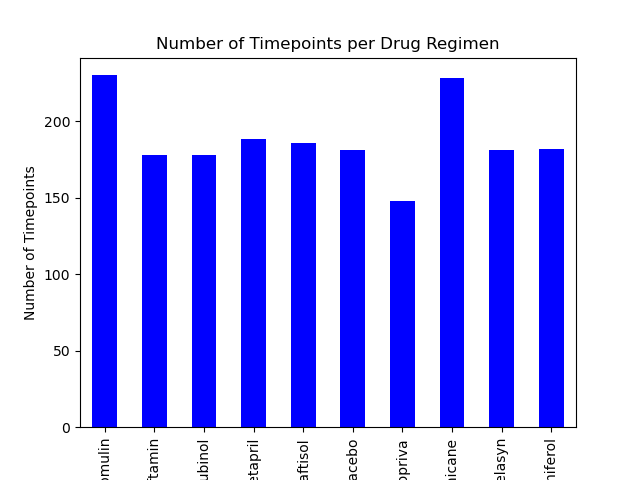

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint_chart_pd = pd.DataFrame(mouse_drug_timepoint)
timepoint_chart_pd.plot(kind='bar', color='blue', legend=None, title=bar_title)

plt.xlabel(f'{bar_xlabels}')
plt.ylabel(f'{bar_ylabels}')

plt.show()


<IPython.core.display.Javascript object>


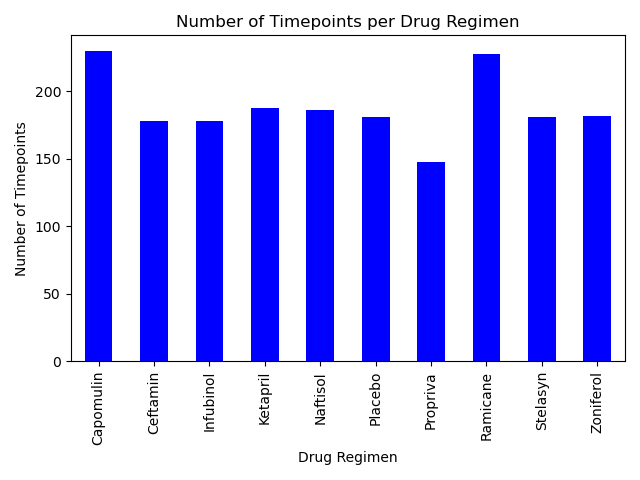

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoint_chart_plt = mouse_drug_timepoint.plot(kind='bar', color='blue', legend=None, title=bar_title, align='center')
timepoint_chart_plt.set_xlabel(bar_xlabels)
timepoint_chart_plt.set_ylabel(bar_ylabels)

plt.show()
plt.tight_layout()

In [13]:
# set variables for chart needs
#b_xlabels = 'Drug Regimen'
#bar_ylabels = 'Number of Timepoints'
#bar_title = 'Number of Timepoints per Drug Regimen'






In [14]:
# pull out gender and the id_s attached
mouse_sex = mouse_study_clean.groupby('Sex')
mouse_sex_number = mouse_sex[['Mouse ID']].count()
mouse_sex_total = mouse_study_clean[['Mouse ID']].count()
mouse_sex_percent = (round((mouse_sex_number / mouse_sex_total) * 100),2)
mouse_sex_percent

(        Mouse ID
 Sex             
 Female      49.0
 Male        51.0,
 2)

In [15]:
# pull out gender and the id_s attached (for challenge)
mouse_sex = mouse_study_clean.groupby('Sex')
mouse_sex_count = mouse_sex['Sex'].count()

In [23]:
# pull out gender and the id_s attached
mouse_sex = mouse_study_clean.groupby('Sex'),drop_duplicates()
mouse_sex_count = mouse_sex['Sex'].count()
mouse_sex_count

AttributeError: 'DataFrameGroupBy' object has no attribute 'unique'

In [22]:
#temp
mouse_sex_chart_pd = pd.DataFrame(mouse_sex_percent)
mouse_sex_chart_pd.plot.pie(y='Sex', color='blue', legend=None, title=bar_title)
mouse_sex_chart_pd

KeyError: 'Sex'

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
plt.figure()
mouse_sex_count.plot.pie(y='Sex', autopct="%1.1f%%", title='Percentage of Study Mice by Gender',figsize=(5, 5))
plt.show()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_sex.groupby(['Sex']).sum().plot(kind='pie', y='Sex of Mice', title='Percentage of Study Mice by Gender')
#plot.pie(mouse_sex_count.plot.pie(legend=None, y='Sex', title='Percentage of Study Mice by Gender')
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
Capomulin_data = mouse_study_clean.loc[mouse_study_clean['Drug Regimen'] == 'Capomulin', 'Tumor Volume (mm3)']
Camomulin_data_merged = 

In [18]:
#Capomulin_vol = mouse_study_clean['Tumor Volume (mm3)'].max()
#Capomulin_vol = mouse_study_clean(['Drug Regimen'] == 'Capomulin')['Tumor Volume (mm3)'].max()

#regimins_list = [Capomulin, Ramicane, Infubinol, Ceftamin]

Capomulin_data = mouse_study_clean.loc[mouse_study_clean['Drug Regimen'] == 'Capomulin', 'Tumor Volume (mm3)']

Ramicane_data = mouse_study_clean.loc[mouse_study_clean['Drug Regimen'] == 'Ramicane', 'Tumor Volume (mm3)']
Infubinol_data = mouse_study_clean.loc[mouse_study_clean['Drug Regimen'] == 'Infubinol', 'Tumor Volume (mm3)']
Ceftamin_data = mouse_study_clean.loc[mouse_study_clean['Drug Regimen'] == 'Ceftamin', 'Tumor Volume (mm3)']

Capomulin_data, Ramicane_data, Infubinol_data, Ceftamin_data

(0       45.000000
 226     45.000000
 227     45.000000
 228     45.000000
 229     45.000000
           ...    
 1854    40.728578
 1859    38.125164
 1878    47.685963
 1888    41.581521
 1889    31.023923
 Name: Tumor Volume (mm3), Length: 230, dtype: float64,
 58      45.000000
 59      45.000000
 60      45.000000
 61      45.000000
 62      45.000000
           ...    
 1867    40.667713
 1870    29.128472
 1874    37.225650
 1879    32.978522
 1885    33.562402
 Name: Tumor Volume (mm3), Length: 228, dtype: float64,
 29      45.000000
 30      45.000000
 31      45.000000
 32      45.000000
 33      45.000000
           ...    
 1789    66.196912
 1794    66.083066
 1802    62.435404
 1804    67.973419
 1806    60.918767
 Name: Tumor Volume (mm3), Length: 178, dtype: float64,
 170     45.000000
 171     45.000000
 172     45.000000
 173     45.000000
 174     45.000000
           ...    
 1858    68.923185
 1862    61.386660
 1864    64.299830
 1872    59.741901
 1890    61.433

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_data = mouse_study_clean.loc[mouse_study_clean['Drug Regimen'] == 'Capomulin','Tumor Volume (mm3)']
Ramicane_data = mouse_study_clean.loc[mouse_study_clean['Drug Regimen'] == 'Ramicane', 'Tumor Volume (mm3)']
Infubinol_data = mouse_study_clean.loc[mouse_study_clean['Drug Regimen'] == 'Infubinol', 'Tumor Volume (mm3)']
Ceftamin_data = mouse_study_clean.loc[mouse_study_clean['Drug Regimen'] == 'Ceftamin', 'Tumor Volume (mm3)']

# Start by getting the last (greatest) timepoint for each mouse
Capomulin_vol_final = Capomulin_data.max()
Ramicane_vol_final = Ramicane_data.max()
Infubinol_vol_final = Infubinol_data.max()
Ceftamin_vol_final =Ceftamin_data.max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

#######see next cell

# test numbers
Capomulin_data, Ramicane_data, Infubinol_data, Ceftamin_data
#Capomulin_vol_final, Ramicane_vol_final, Infubinol_vol_final, Ceftamin_vol_final

(0       45.000000
 226     45.000000
 227     45.000000
 228     45.000000
 229     45.000000
           ...    
 1854    40.728578
 1859    38.125164
 1878    47.685963
 1888    41.581521
 1889    31.023923
 Name: Tumor Volume (mm3), Length: 230, dtype: float64,
 58      45.000000
 59      45.000000
 60      45.000000
 61      45.000000
 62      45.000000
           ...    
 1867    40.667713
 1870    29.128472
 1874    37.225650
 1879    32.978522
 1885    33.562402
 Name: Tumor Volume (mm3), Length: 228, dtype: float64,
 29      45.000000
 30      45.000000
 31      45.000000
 32      45.000000
 33      45.000000
           ...    
 1789    66.196912
 1794    66.083066
 1802    62.435404
 1804    67.973419
 1806    60.918767
 Name: Tumor Volume (mm3), Length: 178, dtype: float64,
 170     45.000000
 171     45.000000
 172     45.000000
 173     45.000000
 174     45.000000
           ...    
 1858    68.923185
 1862    61.386660
 1864    64.299830
 1872    59.741901
 1890    61.433

In [ ]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

for drug in drug_regimen
    if (mouse_study_clean['Drug _Regimen'] == 'Capomulin')
        Capomulin_data.insert(1, 'Max Vol', {Capomulin_vol_final})
        elif mouse_study_clean['Drug _Regimen'] == 'Capomulin':
        Ramicane_data.insert(1, 'Max Vol', {Ramicane_vol_final})


In [17]:
merged_mouse_study = pd.DataFrame(mouse_study_clean.loc[mouse_study_clean['Drug_Regimen'] == 'Capomulin'])
merged_mouse_study


KeyError: 'Drug_Regimen'

In [21]:
#testing another way to do this
tumor_vol_max = mouse_study_clean.loc[mouse_study_clean.reset_index().groupby(['Drug Regimen'])['Tumor Volume (mm3)'].idxmax()]
#tumor_vol_max.rename(columns={'Tumor Volume (mm3)_x': 'Tumor Vol Max (mm3)'}, inplace=False)
tumor_vol_max

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1000,c559,20,52.604367,2,Zoniferol,Female,19,28
1845,a492,45,60.122011,1,Stelasyn,Male,20,25
1768,b559,45,73.051363,1,Naftisol,Male,20,26
1765,l661,45,59.851956,3,Ceftamin,Male,18,26
1848,c559,45,61.840058,4,Zoniferol,Female,19,28
1780,i334,45,36.374510,2,Ramicane,Female,8,20
1871,i635,45,58.633404,3,Propriva,Male,21,26
1407,z969,30,65.841013,3,Naftisol,Male,9,30
1817,l897,45,38.846876,1,Capomulin,Male,17,19
1827,k862,45,69.299149,4,Stelasyn,Female,13,25


In [ ]:
mouse_with_max = mouse_study_clean.merge(tumor_vol_max, on=('Mouse ID','Timepoint'), how = 'left')
print(mouse_with_max)
def drop_y(df):
    # list comprehension of the cols that end with '_y'
    to_drop = [x for x in mouse_with_max if x.endswith('_y')]
        if x != 'Tumor Volume (mm3)_y':
         tumor_vol_max.rename(columns={'Tumor Volume (mm3)_x': 'Tumor Vol Max (mm3)'}, inplace=False)   
    mouse_with_max.drop(to_drop, axis=1, inplace=True)


In [ ]:
# variables

# Put treatments into a list for for loop (and later for plot labels)
 


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

### see next cell


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
## this will create a dataframe for each drug treatment
capomulin_df = pd.DataFrame(Capomulin_data, columns=['Mouse ID','Timepoint', 'Drug Regimen','Tumor Volume (mm3)','Tumor Vol Max (mm3)'])
ramicane_df = pd.DataFrame(Ramicane_data, columns=['Mouse ID','Timepoint', 'Drug Regimen','Tumor Volume (mm3)','Tumor Vol Max (mm3)'])
infubinol_df = pd.DataFrame(Infubinol_data, columns=['Mouse ID','Timepoint', 'Drug Regimen','Tumor Volume (mm3)','Tumor Vol Max (mm3)'])
ceftamin_df = pd.DataFrame(Ceftamin_data, columns=['Mouse ID','Timepoint', 'Drug Regimen','Tumor Volume (mm3)','Tumor Vol Max (mm3)'])

mouse_treat_dfs = [capomulin_df, ramicane_df, infubinol_df, ceftamin_df]
## this will create a big dataframe composed of all the dfs
mouse_treat_final = pd.concat(mouse_treat_dfs, axis=1)

## this creates one boxplot for the first dataframe, loop through this

## for drug in regimine....
mouse_box_plot = mouse_treat_final.iloc[:,0:3].boxplot()
plt.show()

In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

